## CSCI 4580/5580 - Data Science – Fall 2020
### Lab 3: Statistical Analysis

##### Name: Sharvita Paithankar
##### Student ID: 108172438


In this lab we will review some basic tools for statistical analysis.

# Inferential Statistics

Inferential statistics is about making inferences about what produced the data: a single process or two? a linear process or a constant one? It contrasts with descriptive statistics which is about measuring properties of the data, and in turn making estimates about a population. 

We'll begin by initializing a random seed for Numpy's random number generator. The random numbers generated by computers are actually pseudo-random, meaning they form a repeatable sequence given the seed. With the same seed, you will always get the same sequence of pseudo-random numbers which is good for repeatability or testing correctness of a program. On the other hand, if you execute the other cells of this notebook without setting the seed, you can see how the results vary between random samples. 

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
np.random.seed(12345678)

Next we'll generate two samples of 400 points from the normal distribution. The first has mean zero, the second has a mean (loc param) of 0.15. Both have unit variance.

In [2]:
a = stats.norm.rvs(size=400)
b = stats.norm.rvs(loc=0.15, size=400)

Let's look at histograms of both distributions on the same set of bins:

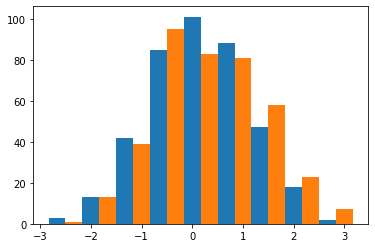

In [3]:
bins = np.linspace(-3,3,10)
plt.hist(a,bins,rwidth=0.5)
plt.hist(b,bins,rwidth=0.5,align=u'right')
plt.show()

## Two-Sample T-test

Let's start by analyzing our data with a two-sample T-test. This test will evaluate the null hypothesis that the two samples have the same mean.

In [4]:
stats.ttest_ind(a, b)

Ttest_indResult(statistic=-1.6540130327107168, pvalue=0.09851813011169046)

The test returns the value of the t-statistic, and the p-value of the t-test. Review the formula for the t-statistic, and make sure you agree with the value it generated.

<b>Q1</b>) Was the test significant at the 0.05 significance level? [10 points]
<br>answer: A test is significant is the pvalue is below 0.05. The test was not significant since the pvalue is larger than 0.05
<br>Enter the t-statistic value, and the p-value below:
<br>t-stat: -1.6540130327107168
<br>p-value: 0.09851813011169046

Try running the cells above again *without* initializing the random number generator again (don't eval that cell). What happened this time? This is a good reminder that unusual events can happen by chance. 

Now set the random seed again and generate data:

In [5]:
np.random.seed(12345678)
a = stats.norm.rvs(size=400)
b = stats.norm.rvs(loc=0.15, size=400)

In [11]:
ea=np.exp(a)
eb=np.exp(b)

Which will produce skewed (non-normal) distributions for the datasets. Now let's try the t-test again.

<b>Q2</b>) Repeat the t-test on these new vectors. Increase the bin range to (-3,20). Then plot histogram of both distributions. Was the test significant at the 0.05 significance level? [30 points]

<br> Answer: The test was significant since the p-value is 0.017587109088813016 which is below 0.05


In [12]:
# add code for t-test here 
stats.ttest_ind(ea, eb)

Ttest_indResult(statistic=-2.3791444033418028, pvalue=0.017587109088813016)

In [1]:
# plot the histogram here
#Non- Normal distribution historgram
bins = np.linspace(-3,20,10)
plt.hist(a,bins,rwidth=0.5)
plt.hist(b,bins,rwidth=0.5,align=u'right')
plt.show()

#Normal distribution historgram
bins = np.linspace(-3,3,10)
plt.hist(a,bins,rwidth=0.5)
plt.hist(b,bins,rwidth=0.5,align=u'right')
plt.show()

NameError: name 'np' is not defined

## The K-S Test

The Kolmogorov-Smirnov test is a very versatile, non-parametric test that compares samples of data from (potentially) different distributions. You can apply it directly to datasets such as ea and eb above. Go ahead and try it:

In [8]:
stats.ks_2samp(ea,eb)

KstestResult(statistic=0.0775, pvalue=0.18096072488295206)

<b>Q3</b>) Was the ks-test result significant at 0.05? Compare it with the test on (a,b) and the test on (ea,ab). Which result is it closer to? What does this tell you about the reliability of these tests? [25 points]

Answer: The ks-test was not significant at 0.5 since the pvalue is 0.18096072488295206 which is larger. The ea, eb test value is pvalue=0.017587109088813016 which is below 0.05 and therefore is significant. The test on (ea,ab) is closer and this tells us that these tests are not always reliable, but it rather depends on what type of data is being analysed. 

## Analyzing Discrete Data

Often, you'll want to analyze discrete data, especially count data. Bag-of-Words text data is an important case. Next load the dataset for this exercise. 

In [14]:
import pandas as pd
nips = pd.read_csv("nips.10cols.txt",sep="\t")

and take a look at the first few rows:

In [15]:
nips.head(10)

,term1,term2,term3,term4,term5,term6,term7,term8,term9,term10
0,67,7,18,7,5,1,16,3,4,3
1,44,0,11,6,37,10,3,31,0,6
2,27,1,16,5,15,1,12,6,9,2
3,16,11,26,35,21,10,10,17,21,28
4,31,3,48,25,14,8,18,40,2,1
5,75,0,17,3,12,26,43,16,50,0
6,22,28,3,20,9,13,6,26,20,5
7,17,1,13,9,5,3,10,17,0,1
8,22,0,33,5,28,1,16,26,6,1
9,23,1,21,39,16,7,9,13,4,1


The rows represent documents from a conference (NIPS). The columns represent certain key words (they've been obfuscated). From the frequencies of these words, you can determine something about the topic of the paper. But you can't simply compare counts. The chances of two documents having exactly the same word counts is close to zero, even if the topics are very similar. 

Instead we can use a statistical test to ask whether the same random process might have generated two different rows in the table. The appropriate test is the Chi-squared test. 

Let's compare the counts for documents 1479 and 1480 for term1 and term2: (note we have to number carefully since column labels are one-based)

In [16]:
nmat = nips.to_numpy()
m=nmat[1479:1481,[0,1]]
m

array([[11, 21],
       [10, 12]])

In [17]:
stats.chi2_contingency(m)

(0.2878910861865407,
 0.5915751520487913,
 1,
 array([[12.44444444, 19.55555556],
        [ 8.55555556, 13.44444444]]))

The test returns (first) the statistic value, and then the p-value.

<b>Q4</b>) Was the chi-squared test significant at 0.05? [10 points] 

answer: The statistic value is 0.2878910861865407 and the pvalue is 0.5915751520487913 which is larger than 0.05, therefore, it is not significant. 

<b>Q5</b>) Repeat the test for term 4 and term 6 of the same documents (careful about numbering). What was the p-value?  [25 points]

In [19]:
# add you code for Q6 here
nmat = nips.to_numpy()
m=nmat[1479:1481,[3,5]]
m
stats.chi2_contingency(m)


(4.6875,
 0.030382821976577483,
 1,
 array([[ 3.,  6.],
        [ 6., 12.]]))

answer: The pvalue for term 4 and 6 is 0.030382821976577483. This is significant. 